<a href="https://colab.research.google.com/github/Fatimakhanim/Machine-learning-Projects/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means

In [ ]:
import numpy as np

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X,y = make_blobs(n_samples=2000, centers=blob_centers,
                cluster_std=blob_std, random_state=7)

k=5
kmeans = KMeans(n_clusters=k,n_init=10,random_state = 42)
y_pred = kmeans.fit_predict(X)

In [ ]:
X.shape

(2000, 2)

In [ ]:
import matplotlib.pyplot as plt

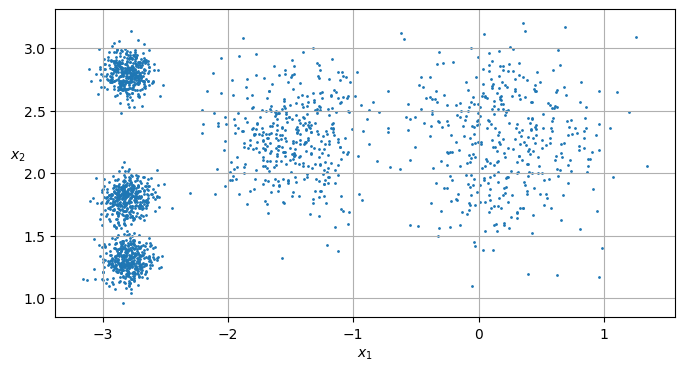

In [ ]:
def plot_clusters(X,y=None):
  plt.scatter(X[:,0],X[:,1],c= y,s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$",rotation = 0)

plt.figure(figsize = (8,4))
plot_clusters(X)
plt.grid()
plt.show()


In [ ]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [ ]:
import numpy as np

In [ ]:
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

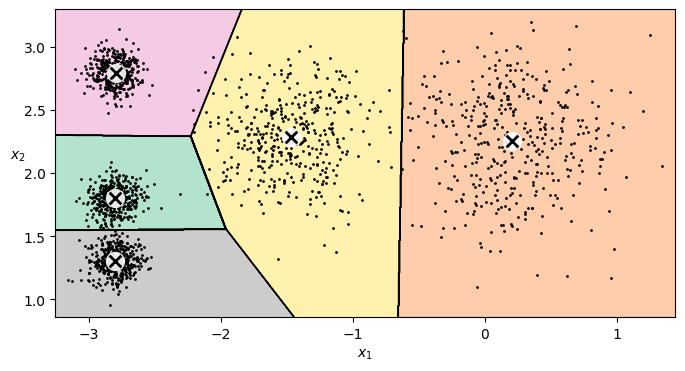

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [ ]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

#K-Means Algorithms

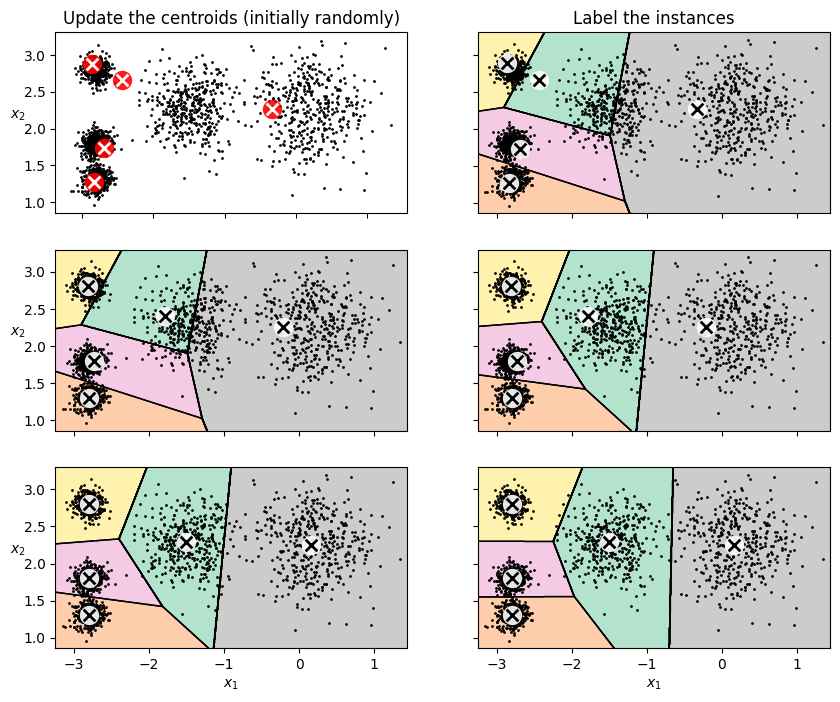

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

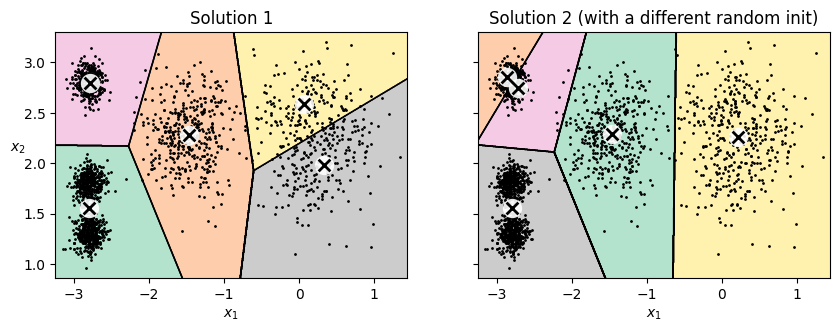

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")


plt.show()

In [ ]:
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters = 5,init = good_init,n_init = 1,random_state = 42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

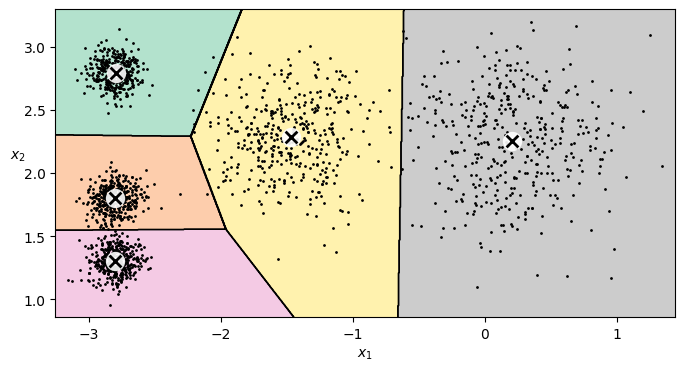

In [ ]:
plt.figure(figsize = (8,4))
plot_decision_boundaries(kmeans,X)

In [ ]:
kmeans.score(X)

-211.59853725816836

In [ ]:
kmeans_rnd_init1.inertia_

219.43539442771396

#Mini-Batch K-Means

In [ ]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters = 5,n_init = 3,random_state = 42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [ ]:
minibatch_kmeans.inertia_

211.65239850433215

In [ ]:
from sklearn.datasets import fetch_openml
mnist= fetch_openml("mnist_784",as_frame = False,parser = "auto")

In [ ]:
X_train,y_train = mnist.data[:60000],mnist.target[:60000]
X_test,y_test = mnist.data[60000:],mnist.target[60000:]

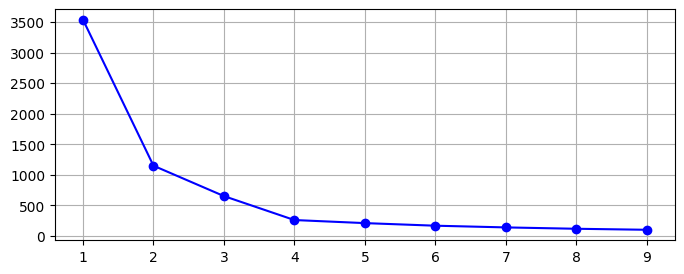

In [ ]:
kmeans_per_k =[KMeans(n_clusters=k, n_init=10,random_state = 42).fit(X) for k in range(1,10)]
inertia = [model.inertia_ for model in kmeans_per_k ]
plt.figure(figsize = (8,3))
plt.plot(range(1,10),inertia,"bo-")
plt.grid()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:

silhouette_score(X,kmeans.labels_)

0.655517642572828

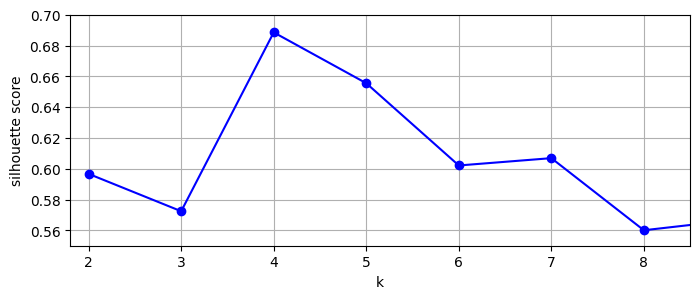

In [ ]:
silhouette_scores = [silhouette_score(X,model.labels_)
                    for model in kmeans_per_k[1:]]
plt.figure(figsize = (8,3))
plt.plot(range(2,10),silhouette_scores,"bo-")
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.axis([1.8,8.5,0.55,0.7])
plt.grid()

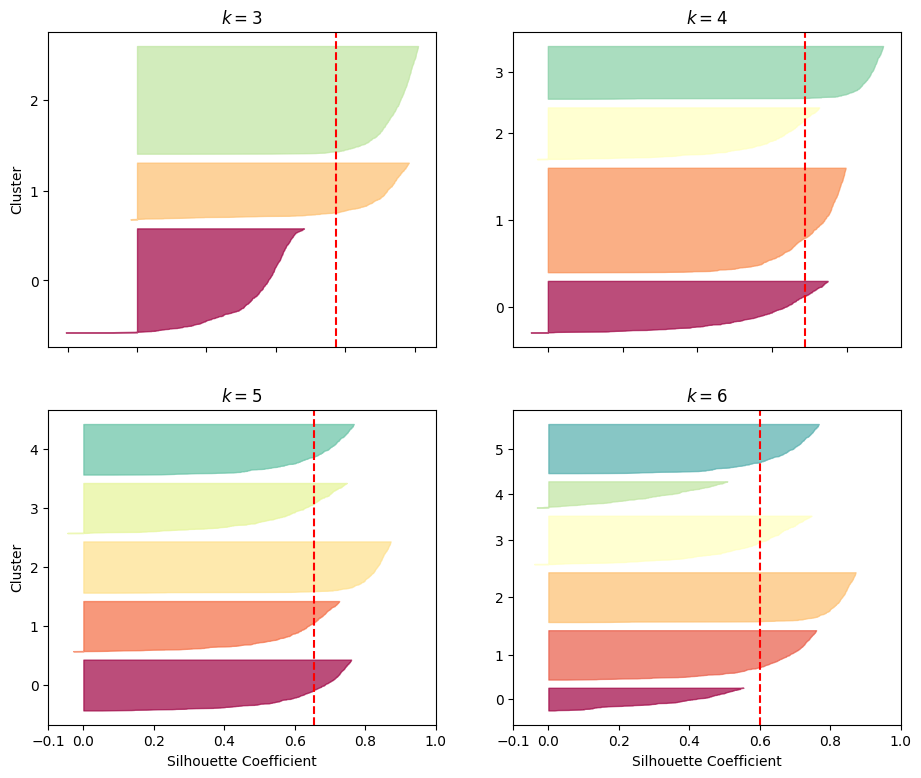

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

In [ ]:
import PIL

image = np.asarray(PIL.Image.open("/content/WhatsApp Image 2024-06-12 at 19.16.29_1aa2ed53.jpg"))
image.shape

(533, 800, 3)

In [ ]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8,n_init = 10,random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

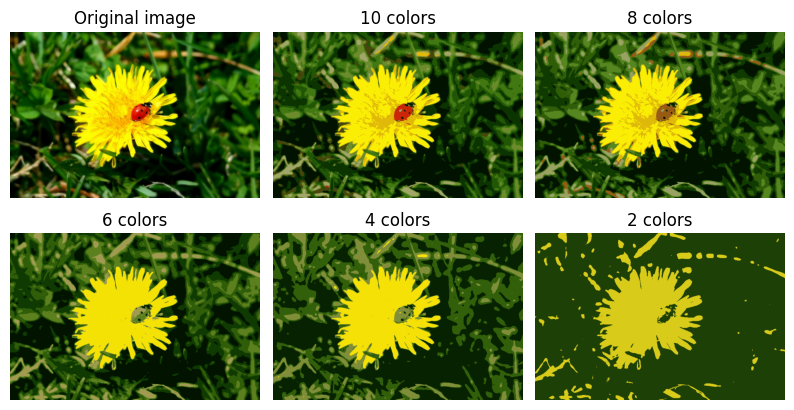

In [ ]:
segmented_imgs = []
n_colors=(10,8,6,4,2)
for n_clusters in n_colors:
  kmeans=kmeans = KMeans(n_clusters=n_clusters,n_init = 10,random_state=42).fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize = (10,5))
plt.subplots_adjust(wspace=0.05,hspace=0.1)

plt.subplot(2,3,1)
plt.imshow(image)
plt.title("Original image")
plt.axis("off")

for idx, n_clusters in enumerate(n_colors):
  plt.subplot(2,3,2+idx)
  plt.imshow(segmented_imgs[idx]/255)
  plt.title(f"{n_clusters} colors")
  plt.axis("off")

In [ ]:
from sklearn.datasets import load_digits

X_digits, y_digits= load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:],y_digits[1400:]

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter =10000)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test,y_test)

0.7481108312342569

In [ ]:
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.906801007556675

In [ ]:
k=50
kmeans = KMeans(n_clusters = k, n_init=10,random_state =42)
X_digits_dist =kmeans.fit_transform(X_train)
representative_digit_idx =X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

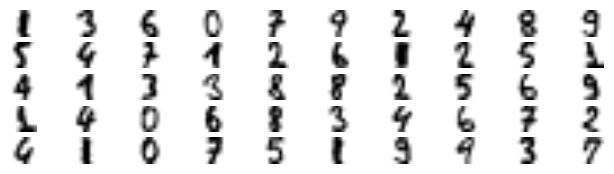

In [ ]:
plt.figure(figsize = (8,2))
for index,X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(k//10,10,index+1)
  plt.imshow(X_representative_digit.reshape(8,8),cmap ="binary",
              interpolation ="bilinear")
  plt.axis("off")

plt.show()

In [ ]:
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

In [ ]:
log_reg.fit(X_representative_digits,y_representative_digits)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test,y_test)

0.8488664987405542

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
  y_train_propagated[kmeans.labels_==i]= y_representative_digits[i]

In [ ]:
log_reg=LogisticRegression(max_iter=10_000)
log_reg.fit(X_train,y_train_propagated)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test,y_test)

0.8942065491183879

In [ ]:
percentile_closest =99

X_cluster_dist =X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
  in_cluster = (kmeans.labels_==i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist,percentile_closest)
  above_cutoff = (X_cluster_dist>cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff]=-1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_train_partially_propagated,y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9093198992443325